In [1]:
import pandas as pd
import numpy as np

In [2]:
df_kpi = pd.read_csv("bb results/bb kpi.csv",index_col=0)

In [3]:
df_kpi

,District
cost_function,
annual_peak_average,1.198347
carbon_emissions_total,0.917995
cost_total,0.830110
daily_one_minus_load_factor_average,1.412863
daily_peak_average,1.005608
electricity_consumption_total,0.928516
monthly_one_minus_load_factor_average,0.997774
ramping_average,1.331715
zero_net_energy,1.109182


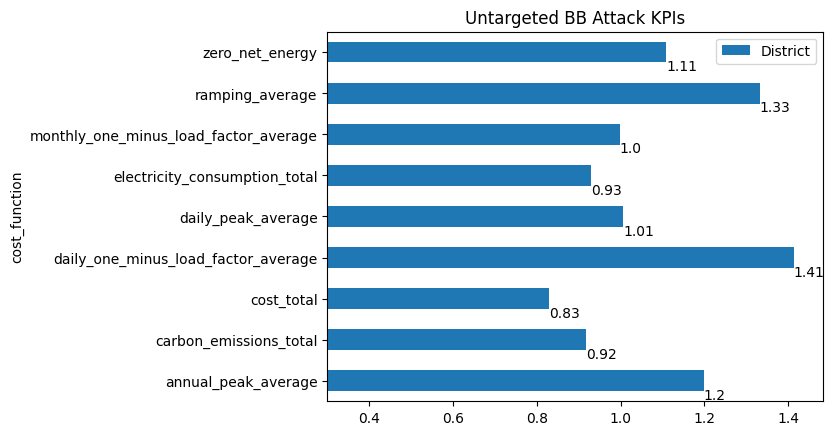

In [5]:
ax = df_kpi.plot.barh(xlim=0.3, title='Untargeted BB Attack KPIs', ylabel='Normalized KPI')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), 
            i.get_y()-0.2,
            str(round((i.get_width()), 2)), 
            fontsize=10, 
            #color='dimgrey'
            )
ax.set_ylabel ='Normalized KPI'

In [6]:
df_kpi['baseline'] = pd.read_csv('KPIs.csv', usecols=['baseline']).values

In [7]:
df_kpi['baseline']

cost_function
annual_peak_average                      1.102271
carbon_emissions_total                   0.869186
cost_total                               0.787803
daily_one_minus_load_factor_average      1.095762
daily_peak_average                       0.894595
electricity_consumption_total            0.879108
monthly_one_minus_load_factor_average    0.988364
ramping_average                          1.093749
zero_net_energy                          1.107710
Name: baseline, dtype: float64

In [8]:
df_kpi.index

Index(['annual_peak_average', 'carbon_emissions_total', 'cost_total',
       'daily_one_minus_load_factor_average', 'daily_peak_average',
       'electricity_consumption_total',
       'monthly_one_minus_load_factor_average', 'ramping_average',
       'zero_net_energy'],
      dtype='object', name='cost_function')

In [10]:
df_kpi.columns = ['Untargeted_BB','Baseline']

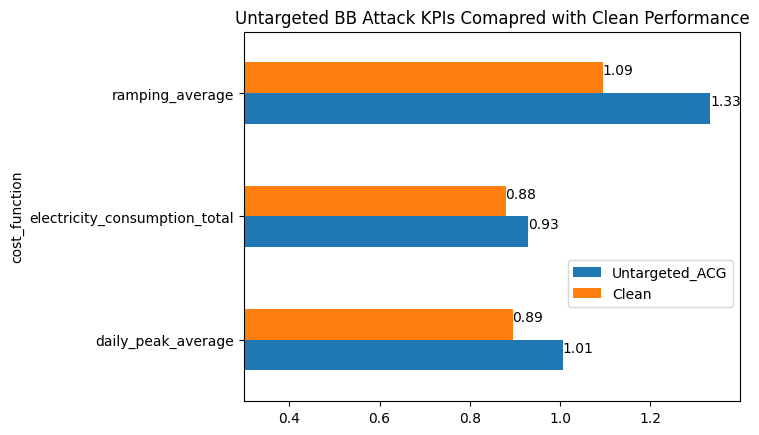

In [13]:
rows = ['daily_peak_average','electricity_consumption_total','ramping_average']
ax = df_kpi.loc[rows].plot.barh(
                                            #xerr = [df_kpi['std'].loc[rows], np.zeros(df_kpi['std'].loc[rows].shape)], 
                                           xlim=0.3, 
                                           title='Untargeted BB Attack KPIs Comapred with Clean Performance', 
                                           ylabel='Normalized KPI')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), 
            i.get_y() + 0.15,
            str(round((i.get_width()), 2)), 
            fontsize=10, 
            #color='dimgrey'
            )
ax.set_ylabel ='Normalized KPI'
ax.legend(bbox_to_anchor=(1.0, .4), labels=['Untargeted_ACG', 'Clean'])